# Mean and standard deviation
### Magdalena Augustyńska

In [1]:
from numpy.random import poisson
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats
import random
from scipy.stats import norm

**Problem 3b.** In this task we consider a discrete distribution *without a mean* and verify whether we can still estimate the location of its peak by simply computing averages. Consider a discrete variable $X$ with the following distribution: $P(X=k) = \frac{1}{4|k|(|k|+1)}$ for $k \neq 0$ and $P(X=0) = \frac{1}{2}$. 
 * Argue that these formulas indeed describe a discrete distribution.
 * Show that $X$ does not have a mean.
 * Plot the function $f(k) = P(X=k)$ for $k \in [-10,10]$.
 * Write a function that samples from $X$'s distribution (imaginary bonus points if it is vectorized).
 * Generate $N=10\,000$ values $x_1,\ldots,x_n$ from the distribution.
 * For $i \in \{1,\ldots,n\}$ compute $\bar{x}_i = \frac{x_1+\ldots+x_i}{i}$. 
 * Plot the values of $\bar{x}_i$. Does it look like the series converges? If it is not clear, you can compute several independent
   $N$-means and plot a histogram, then increase $N$ significantly and see how it changes.
 * For $i \in \{1,\ldots,n\}$ compute $\hat{x}_i = \textrm{ median of }\{x_1,\ldots,x_i\}$. 
   You do not need to do it in a clever way (like in ASD lab).
 * Plot the values of $\hat{x}_i$. Does it look like the series converges? 
 * A more interesting situation would be the one where you a given a distribution like $X+c$ for unknown $c$, and 
   want to figure out what $c$ is, i.e. find the center of the distribution. Both methods above attempt to
   locate the center - which works better?

* Argue that these formulas indeed describe a discrete distribution.

These formulas describe discrete distribution because $\sum_{k \in R} P(X=k) = 1$.

$\sum_{k \in R} P(X=k)$ = $\frac{1}{2} + \sum_{k=1}^\infty \frac{1}{4|k|(|k|+1)} + \sum_{k=-1}^{-\infty} \frac{1}{4|k|(|k|+1)}$ = $\frac{1}{2} + \frac{1}{2} * \sum_{k=1}^\infty \frac{1}{k(k+1)} = \frac{1}{2} + \frac{1}{2} * \sum_{k=1}^\infty [ \frac{1}{k} - \frac{1}{k+1} ] = $  
$\frac{1}{2} + \frac{1}{2} + \frac{1}{2} * \sum_{k=2}^\infty \frac{1}{k} - \frac{1}{2} * \sum_{k=1}^\infty \frac{1}{k+1}$ = 1

* Show that $X$ does not have a mean.

$\sum_{k \in R} kP(X=k) = \frac{1}{2} * 0 + \sum_{k=1}^\infty \frac{k}{4|k|(|k|+1)} + \sum_{k=-\infty}^{-1} \frac{k}{4|k|(|k|+1)} = \sum_{k=1}^\infty \frac{1}{4(|k|+1)} - \sum_{k=-\infty}^{-1} \frac{1}{4(|k|+1)} = \sum_{k \in N, k \neq 0}^\infty \frac{1}{4(|k|+1)} = \sum_{k \in N} \frac{1}{4(|k|+1)} - \frac{1}{4} = \frac{1}{4}\sum_{k \in N} \frac{1}{|k|+1} - \frac{1}{4} = \frac{1}{4}\sum_{k \in N} \frac{1}{k+1} - \frac{1}{4}$

Sequence $\sum_{k \in N} \frac{1}{k}$ is divergent, therefore mean of variable X is divergent and doesn't exist.

* Plot the function $f(k) = P(X=k)$ for $k \in [-10,10]$.

In [2]:
def f(k):
    if k == 0:
        return 1/2
    return 1/(4*abs(k)*(abs(k) + 1))

In [3]:
x = list(range(-10, 11))

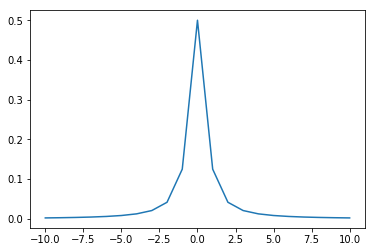

In [4]:
plt.plot(x, [f(arg) for arg in x])

* Write a function that samples from $X$'s distribution (imaginary bonus points if it is vectorized).

I will sample from $X$'s distribution using inverse tranform sampling. In order to do that we first need to find CDF of variable X.

For k < 0: $F(k) = P(X \leqslant k) = \sum_{i=-\infty}^{k} \frac{1}{4|i|(|i|+1)} = \sum_{i=-k}^{\infty} \frac{1}{4i(i+1)} = \frac{1}{4} * \sum_{i=-k}^\infty \frac{1}{i} - \frac{1}{4} * \sum_{i=-k}^\infty \frac{1}{i+1} = \frac{1}{4} * \frac{1}{-k} + \frac{1}{4} * \sum_{i=-k+1}^\infty \frac{1}{i} - \frac{1}{4} * \sum_{i=-k}^\infty \frac{1}{i+1} = -\frac{1}{4k}$


For k = 0: $F(k) = P(X \leqslant k) =  \sum_{i=-\infty}^{-1} \frac{1}{4|i|(|i|+1)} + \frac{1}{2} = P(X \leqslant -1) + \frac{1}{2} = \frac{1}{4} + \frac{1}{2} = \frac{3}{4}$

For k > 0: $F(k) = P(X \leqslant k) = \sum_{i=-\infty}^{-1} \frac{1}{4|i|(|i|+1)} + \frac{1}{2} + \sum_{i=1}^{k} \frac{1}{4|i|(|i|+1)} = \frac{3}{4} + \sum_{i=1}^{k} \frac{1}{4|i|(|i|+1)} = \frac{3}{4} + \frac{1}{4} * \sum_{i=1}^{k} \frac{1}{i} - \frac{1}{4} * \sum_{i=1}^{k} \frac{1}{i+1} = \frac{3}{4} + \frac{1}{4}*1 - \frac{1}{4}*\frac{1}{k+1} = \frac{3}{4} + \frac{k}{4(k+1)} = \frac{4k+3}{4(k+1)}$

Now let's calculate the inverse of CDF.

For k < 0: $F^{-1}(k) = -\frac{1}{4k}$

For k = 0: $F^{-1}(k) = \frac{3}{4}$

For k < 0: $F^{-1}(k) = \frac{3-4k}{4(k-1)}$

In [5]:
def inverse_cdf(k):
    if k < 0:
        return 1/(4*k)
    elif k == 0:
        return 3/4
    else:
        return (3-4*k)/(4*(k-1))

In [6]:
def sample_from_X(size):
    return [inverse_cdf(random.random()) for x in range(size)]

* Generate $N=10\,000$ values $x_1,\ldots,x_n$ from the distribution.

In [7]:
N = 10000
samples = sample_from_X(N)

* For $i \in \{1,\ldots,n\}$ compute $\bar{x}_i = \frac{x_1+\ldots+x_i}{i}$. 

In [8]:
def vector_of_means(samples):
    means = []
    sum = 0
    for i in range(len(samples)):
        sum += samples[i]
        means.append(sum/(i+1))
    return means

In [9]:
means = vector_of_means(samples)

* Plot the values of $\bar{x}_i$. Does it look like the series converges? If it is not clear, you can compute several independent $N$-means and plot a histogram, then increase $N$ significantly and see how it changes.

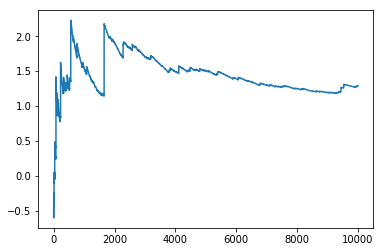

In [10]:
plt.plot(means)

* For $i \in \{1,\ldots,n\}$ compute $\hat{x}_i = \textrm{ median of }\{x_1,\ldots,x_i\}$. 
   You do not need to do it in a clever way (like in ASD lab).

In [11]:
def vector_of_medians(samples):
    medians = []
    for i in range(1, len(samples) + 1):
        first_i_samples = samples[:i]
        sorted_samples = sorted(first_i_samples)
        if i%2 == 0:
            left = i//2 - 1
            right = i//2
            med = (sorted_samples[left] + sorted_samples[right])/2
        else:
            mid = i//2
            med = sorted_samples[mid]
        medians.append(med)
    return medians

In [12]:
medians = vector_of_medians(samples)

* Plot the values of $\hat{x}_i$. Does it look like the series converges? 

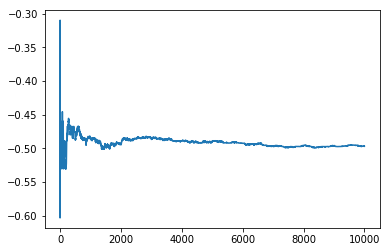

In [13]:
plt.plot(medians)

Yes, it looks like the series converges.